Air Quality Data Analysis using the World Air Quality Index Project API.

# Realtime pollution analysis

api : http://api.waqi.info/

Getting the api key: https://aqicn.org/data-platform/token/#/

Getting the data

In [281]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import api_key_1

In [282]:
city = '@8647'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = api_key_1.get_api_key()

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 153,
 'idx': 8647,
 'attributions': [{'url': 'http://www.bmkg.go.id/',
   'name': 'BMKG | Badan Meteorologi, Klimatologi dan Geofisika',
   'logo': 'Indonesia-Badan-Meteorologi-Klimatologi-dan-Geofisika.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [-6.182536, 106.834236],
  'name': 'Jakarta Central (US Consulate), Indonesia',
  'url': 'https://aqicn.org/city/indonesia/jakarta/us-consulate/central',
  'location': ''},
 'dominentpol': 'pm25',
 'iaqi': {'h': {'v': 47.5},
  'p': {'v': 1012.9},
  'pm25': {'v': 153},
  't': {'v': 34.1},
  'w': {'v': 2.4},
  'wg': {'v': 5}},
 'time': {'s': '2022-08-23 09:00:00',
  'tz': '+07:00',
  'v': 1661245200,
  'iso': '2022-08-23T09:00:00+07:00'},
 'forecast': {'daily': {'o3': [{'avg': 4,
     'day': '2022-08-21',
     'max': 21,
     'min': 1},
    {'avg': 6, 'day': '2022-08-22', 'max': 43, 'min': 1},
    {'avg': 15, 'day': '2022-08-23', 'max': 73, 'min': 2},
    {'avg': 11, 'day': '2022-0

Extracting air quality information

In [283]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


h : 47.5
pm25 : 153
t : 34.1
w : 2.4
wg : 5


In [284]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} (Jakarta) AQI :', aqi,'\n')
print('Individual Air quality')
print('Dew :', dew)
print('no2 :', no2)
print('Ozone :', o3)
print('sulphur :', so2)
print('pm10 :', so2)
print('pm25 :', pm25)


@8647 (Jakarta) AQI : 153 

Individual Air quality
Dew : Nil
no2 : Nil
Ozone : Nil
sulphur : Nil
pm10 : Nil
pm25 : {'v': 153}


Plotting pollutants graph


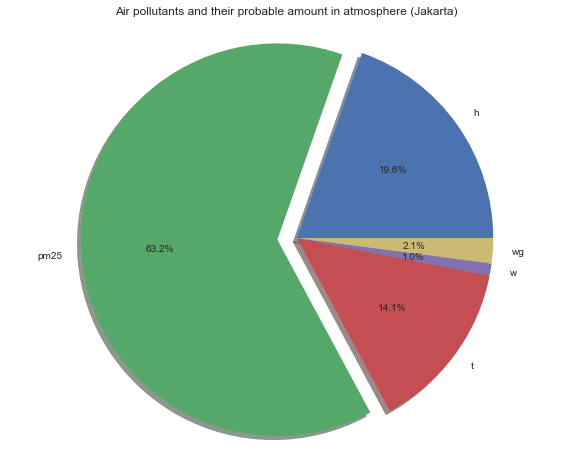

In [285]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere (Jakarta)')

plt.axis('equal')
plt.show()


# Historical data analysis

dataset : http://aqicn.org/data-platform/register/

Read csv files into a dataframe

In [286]:
import pandas as pd


csv_path = './jakarta-central (us consulate)-23-august.csv'

df = pd.read_csv(csv_path)
df = df
print(df)

           date  pm25  pm10
0      2022/8/1    93      
1      2022/8/2   123      
2      2022/8/3   123      
3      2022/8/4    77      
4      2022/8/5    66      
...         ...   ...   ...
2443  2015/9/15         104
2444  2015/9/16          81
2445  2015/9/17          93
2446  2015/9/18          86
2447  2015/9/19          86

[2448 rows x 3 columns]


In [287]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

Renaming column names 

In [288]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10"
                         })

df.columns

Index(['date', 'pm25', 'pm10'], dtype='object')

In [289]:
df.pm10 = df.pm10.str.replace(" ","")
df.pm10 = df.pm10.replace('', 0)
df['pm10'] = pd.to_numeric(df['pm10'])

In [290]:
df.pm25 = df.pm25.str.replace(" ","")
df.pm25 = df.pm25.replace('', 0)
df['pm25'] = pd.to_numeric(df['pm25'])

In [291]:
df['date'] = pd.to_datetime(df.date)

In [292]:
sorted_date_df = df.sort_values('date')
sorted_date_df

,date,pm25,pm10
2401,2015-07-16,0,62
2402,2015-07-17,0,63
2403,2015-07-18,0,60
2404,2015-07-19,0,60
2405,2015-07-20,0,59
...,...,...,...
18,2022-08-19,92,0
19,2022-08-20,93,0
20,2022-08-21,87,0
21,2022-08-22,81,0


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2448 non-null   datetime64[ns]
 1   pm25    2448 non-null   int64         
 2   pm10    2448 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 57.5 KB


In [294]:
df.pm25 == 0

0       False
1       False
2       False
3       False
4       False
        ...  
2443     True
2444     True
2445     True
2446     True
2447     True
Name: pm25, Length: 2448, dtype: bool

- 0 - 50 = Good                                 | PM 2.5 = 0-12.0
- 51 to 100 = Yellow                            | PM 2.5 = 12.1-35.4
- 101 to 150 = Unhealthy for sensitive group    | PM 2.5 = 35.5-55.4 
- 151 to 200 = Unhealthy                        | PM 2.5 = 55.5-150.4
- 201 to 300 = Very unhealthy                   | PM 2.5 = 150.5-250.4
- 301 to 500 = Hazardous                        | PM 2.5 = 250.5-500.4 

### Get the PM 2.5

In [295]:
pm_df = sorted_date_df[['date', 'pm25']]
pm_df

,date,pm25
2401,2015-07-16,0
2402,2015-07-17,0
2403,2015-07-18,0
2404,2015-07-19,0
2405,2015-07-20,0
...,...,...
18,2022-08-19,92
19,2022-08-20,93
20,2022-08-21,87
21,2022-08-22,81


### Good Category

In [296]:
good_pm25_df = pm_df[pm_df.pm25 <= 12]
good_pm25_df.head(1)

,date,pm25
2401,2015-07-16,0


### Moderate Category

In [297]:
yellow_pm25_df = pm_df.query('pm25 > 12 and pm25 <= 35.4')
yellow_pm25_df.head(1)

,date,pm25
2244,2016-01-31,24


### Unhealthy for Sensitive Group

In [298]:
orange_pm25_df = pm_df.query('pm25 > 35.4 and pm25 <= 55.4')
orange_pm25_df.head(1)

,date,pm25
2305,2015-12-25,39


### Unhealthy

In [299]:
red_pm25_df = pm_df.query('pm25 > 55.4 and pm25 <= 150.4')
red_pm25_df.head(1)

,date,pm25
2306,2015-12-26,81


### Very Unhealthy

In [300]:
purple_pm25_df = pm_df.query('pm25 > 150.4 and pm25 <= 250.4')
purple_pm25_df.head(1)

,date,pm25
2182,2016-05-27,159


### Hazardous

In [301]:
maroon_pm25_df = pm_df.query('pm25 > 250.4 and pm25 <= 500.4')
maroon_pm25_df

,date,pm25


No data on hazardous category 

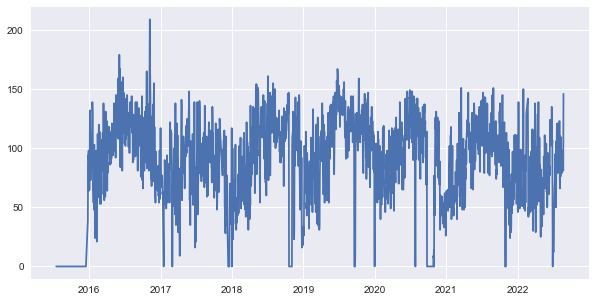

In [302]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sorted_date_df['date'], sorted_date_df['pm25'])

plt.show()

### Get PM 10

In [303]:
pm10_df = sorted_date_df[['date', 'pm10']]
pm10_df

,date,pm10
2401,2015-07-16,62
2402,2015-07-17,63
2403,2015-07-18,60
2404,2015-07-19,60
2405,2015-07-20,59
...,...,...
18,2022-08-19,0
19,2022-08-20,0
20,2022-08-21,0
21,2022-08-22,0


### Good Category

In [304]:
good_pm10_df = pm10_df[pm10_df.pm10 <= 54]
good_pm10_df.head(1)

,date,pm10
2400,2015-12-15,37


### Moderate Category

In [305]:
moderate_pm10_df = pm10_df.query('pm10 > 54 and pm10 <= 154')
moderate_pm10_df.head(1)

,date,pm10
2401,2015-07-16,62


### Unhealthy for Sensitive Group

In [306]:
orange_pm10_df = pm10_df.query('pm10 > 154 and pm10 <= 254')
orange_pm10_df

,date,pm10
1442,2018-04-06,209
200,2022-01-08,192
208,2022-01-16,250


### Unhealthy

In [307]:
red_pm10_df = pm10_df.query('pm10 > 254')
red_pm10_df

,date,pm10


No data for Unhealthy category

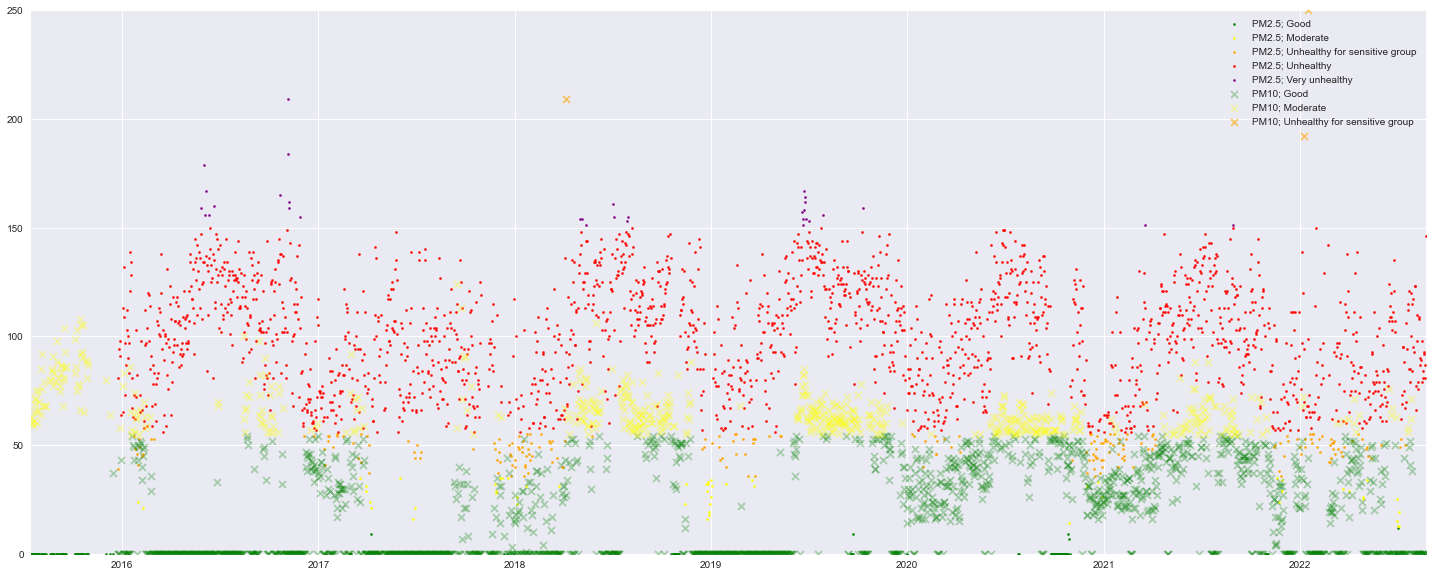

In [308]:
from cProfile import label


fig, ax = plt.subplots(figsize=(25, 10))

ax.scatter(good_pm25_df['date'], good_pm25_df['pm25'],  c='green', label='PM2.5; Good', s=5)
ax.scatter(yellow_pm25_df['date'], yellow_pm25_df['pm25'], c='yellow', label='PM2.5; Moderate',s=5)
ax.scatter(orange_pm25_df['date'], orange_pm25_df['pm25'], c='orange', label='PM2.5; Unhealthy for sensitive group', s=5)
ax.scatter(red_pm25_df['date'], red_pm25_df['pm25'], c='red', label='PM2.5; Unhealthy', s=5)
ax.scatter(purple_pm25_df['date'], purple_pm25_df['pm25'], c='purple', label='PM2.5; Very unhealthy', s=5)
ax.scatter(good_pm10_df['date'], good_pm10_df['pm10'], c='green', marker="x", alpha=0.3, label='PM10; Good')
ax.scatter(moderate_pm10_df['date'], moderate_pm10_df['pm10'], c='yellow', marker="x", alpha=0.3, label='PM10; Moderate')
ax.scatter(orange_pm10_df['date'], orange_pm10_df['pm10'], c='orange', marker="x", alpha=0.6, label='PM10; Unhealthy for sensitive group')

plt.margins(0)

plt.legend()

plt.show()

Extract dates of lockdown

In [309]:
df['date'] = pd.to_datetime(df.date)

# df21 = df.loc[df['date'] > '2020-03-31']
df21 = df.query('date > "2020-04-01" and date < "2022-05-17"')
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10
733,2020-04-02,62,21
734,2020-04-03,68,39
735,2020-04-04,95,41
736,2020-04-05,107,26
737,2020-04-06,81,17
...,...,...,...
93,2022-05-12,63,29
94,2022-05-13,44,49
95,2022-05-14,93,50
96,2022-05-15,92,44


After masks restriction lifted on 17 May 2022

In [310]:
df_mask_lifted_outdoor = df.query('date > "2022-05-17"')
df_mask_lifted_outdoor = df_mask_lifted_outdoor.sort_values(by = 'date')
df_mask_lifted_outdoor

,date,pm25,pm10
99,2022-05-18,78,0
100,2022-05-19,111,20
101,2022-05-20,75,44
102,2022-05-21,66,0
103,2022-05-22,79,0
...,...,...,...
18,2022-08-19,92,0
19,2022-08-20,93,0
20,2022-08-21,87,0
21,2022-08-22,81,0


Extracting before lockdown

In [311]:
mask = (df['date'] >= '2019-12-31') & (df['date']  < '2020-04-01')

past21 = df.loc[mask]
past21 = past21.sort_values(by='date')
past21.head(1)

,date,pm25,pm10
2354,2019-12-31,0,14


Plotting the data

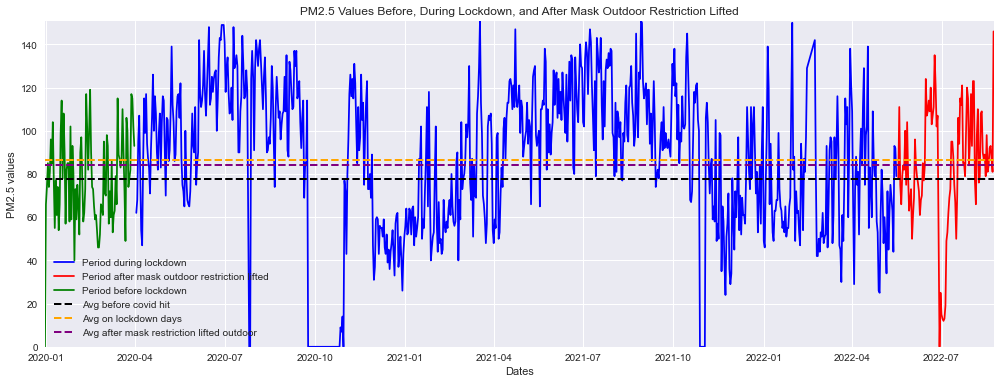

In [312]:
dates = df21['date']
pm25 = df21['pm25']

plt.figure(figsize=(17,6))

length = len(dates)

plt.plot(dates,pm25, c='b', label='Period during lockdown')
plt.plot(df_mask_lifted_outdoor.date, df_mask_lifted_outdoor.pm25, c='r', label='Period after mask outdoor restriction lifted')
plt.plot(past21.date, past21.pm25, c='g', label='Period before lockdown')

plt.axhline(y=past21.pm25.mean(), color='black', linestyle='--', linewidth=2, label='Avg before covid hit')
plt.axhline(y=pm25.mean(), color='orange', linestyle='--', linewidth=2, label='Avg on lockdown days')
plt.axhline(y=df_mask_lifted_outdoor.pm25.mean(), color='purple', linestyle='--', linewidth=2, label='Avg after mask restriction lifted outdoor')

plt.title('PM2.5 Values Before, During Lockdown, and After Mask Outdoor Restriction Lifted')
plt.xlabel('Dates')
plt.ylabel('PM2.5 values')

plt.margins(0)

plt.legend()

plt.show()

Finding solutions to several questions

- 0 - 50 = Good                                 | PM 2.5 = 0-12.0
- 51 to 100 = Yellow                            | PM 2.5 = 12.1-35.4
- 101 to 150 = Unhealthy for sensitive group    | PM 2.5 = 35.5-55.4 
- 151 to 200 = Unhealthy                        | PM 2.5 = 55.5-150.4
- 201 to 300 = Very unhealthy                   | PM 2.5 = 150.5-250.4
- 301 to 500 = Hazardous                        | PM 2.5 = 250.5-500.4 

In [313]:
# check_pm25_category

def check_pm25_category(values):
    if values <= 12:
        return "good"
    elif values <= 35.4:
        return "moderate"
    elif values <= 55.4:
        return "unhealthy for sensitive group"
    elif values <= 150.4:
        return "unhealthy"
    elif values <= 250.4:
        return "very unhealthy"
    elif values <= 500.4:
        return "hazardous"

def check_pm10_category(values):
    if values <= 54:
        return "good"
    elif values <= 154:
        return "moderate"
    elif values <= 254:
        return "unhealthy for sensitive group"
    elif values <= 354:
        return "unhealthy"
    elif values <= 424:
        return "very unhealthy"
    elif values <= 604:
        return "hazardous"


### Check PM2.5

In [314]:
print(f"Before Lockdown, avg: {round(past21.pm25.mean(), 2), check_pm25_category(past21.pm25.mean())}, max: {past21.pm25.max(), check_pm25_category(past21.pm25.max())}")
print(f"During Lockdown, avg: {round(df21.pm25.mean(), 2), check_pm25_category(df21.pm25.mean())}, max: {df21.pm25.max(), check_pm25_category(df21.pm25.max())}")
print(f"After mask rest. lifted, avg: {round(df_mask_lifted_outdoor.pm25.mean(), 2), check_pm25_category(df_mask_lifted_outdoor.pm25.mean())}, max: {df_mask_lifted_outdoor.pm25.max(), check_pm25_category(df_mask_lifted_outdoor.pm25.max())}")


Before Lockdown, avg: (77.65, 'unhealthy'), max: (119, 'unhealthy')
During Lockdown, avg: (86.63, 'unhealthy'), max: (151, 'very unhealthy')
After mask rest. lifted, avg: (84.31, 'unhealthy'), max: (146, 'unhealthy')


### Check PM10

In [315]:
print(f"Before Lockdown, avg: {round(past21.pm10.mean(), 2), check_pm10_category(past21.pm10.mean())}, max: {past21.pm10.max(), check_pm10_category(past21.pm10.max())}")
print(f"During Lockdown, avg: {round(df21.pm10.mean(), 2), check_pm10_category(df21.pm10.mean())}, max: {df21.pm10.max(), check_pm10_category(df21.pm10.max())}")
print(f"After mask rest. lifted, avg: {round(df_mask_lifted_outdoor.pm10.mean(), 2), check_pm10_category(df_mask_lifted_outdoor.pm10.mean())}, max: {df_mask_lifted_outdoor.pm10.max(), check_pm10_category(df_mask_lifted_outdoor.pm10.max())}")

Before Lockdown, avg: (27.18, 'good'), max: (55, 'moderate')
During Lockdown, avg: (37.77, 'good'), max: (250, 'unhealthy for sensitive group')
After mask rest. lifted, avg: (11.85, 'good'), max: (76, 'moderate')


### Recent Occurance

In [316]:
august_df = df_mask_lifted_outdoor.query("date > '2022-07-31'")
august_df

,date,pm25,pm10
0,2022-08-01,93,0
1,2022-08-02,123,0
2,2022-08-03,123,0
3,2022-08-04,77,0
4,2022-08-05,66,0
5,2022-08-06,98,0
6,2022-08-07,110,0
7,2022-08-08,76,0
8,2022-08-09,79,0
9,2022-08-10,108,0


In [317]:
august_df = august_df.drop(['pm10'], axis=1)
august_df

,date,pm25
0,2022-08-01,93
1,2022-08-02,123
2,2022-08-03,123
3,2022-08-04,77
4,2022-08-05,66
5,2022-08-06,98
6,2022-08-07,110
7,2022-08-08,76
8,2022-08-09,79
9,2022-08-10,108


In [318]:
august_pm25 = [check_pm25_category(pm25) for pm25 in august_df['pm25']]
august_pm25

['unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy',
 'unhealthy']

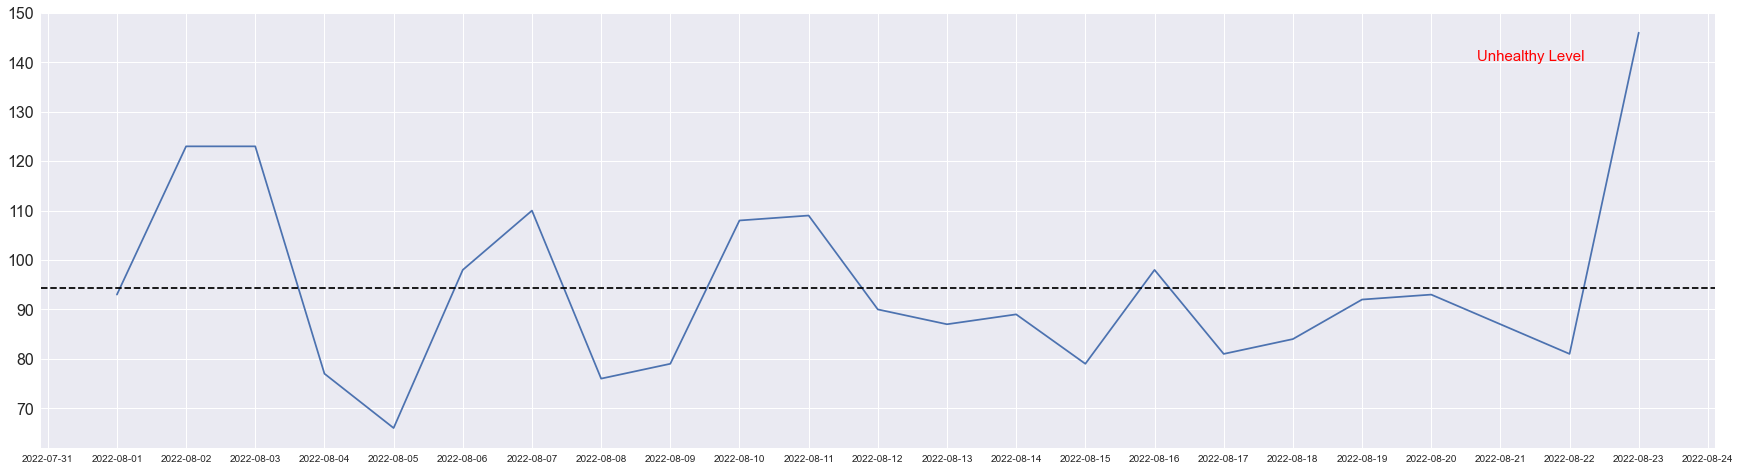

In [323]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(30, 8))
tick_spacing = 1
ax.plot(august_df['date'], august_df['pm25'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.yticks(fontsize=16)

plt.text(0.89, 0.9, 'Unhealthy Level', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=15, c='red')

ax.axhline(y=np.nanmean(august_df['pm25']), c='black', linestyle='--')

plt.show();

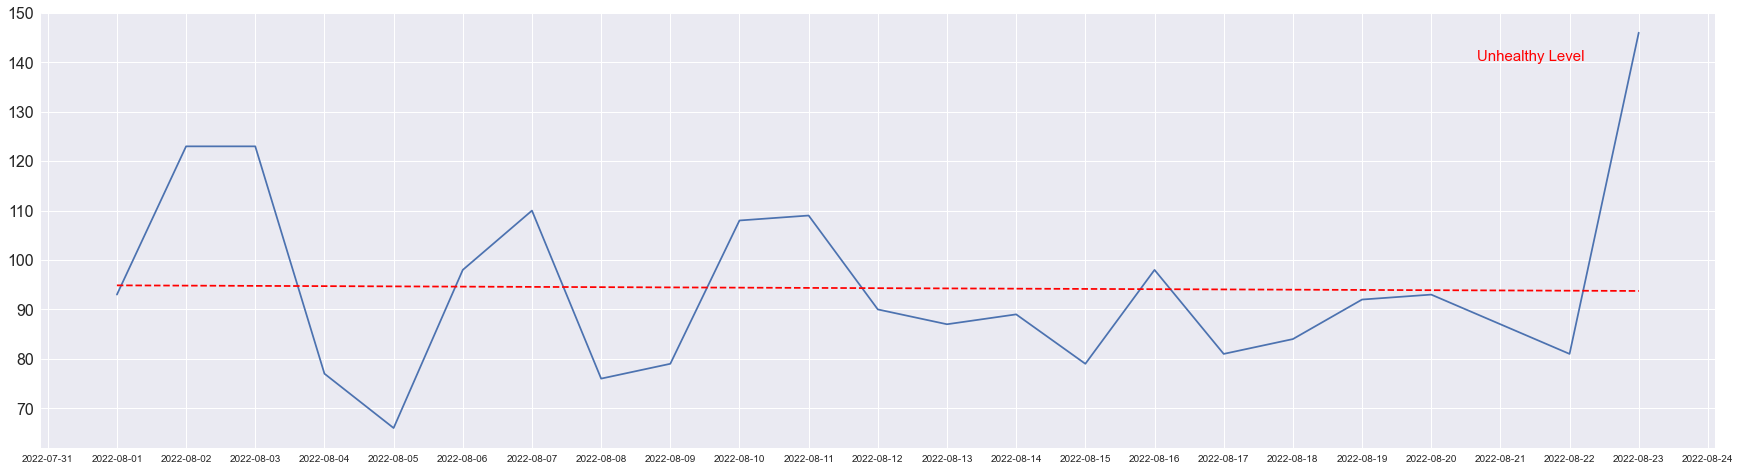

In [320]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(30, 8))
tick_spacing = 1
ax.plot(august_df['date'], august_df['pm25'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.yticks(fontsize=16)

plt.text(0.89, 0.9, 'Unhealthy Level', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=15, c='red')

# mean line
# ax.axhline(y=np.nanmean(august_df['pm25']), c='red')

# trend line
import matplotlib.dates as mdates
x = mdates.date2num(august_df['date'])
y= august_df['pm25']

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(pd.to_datetime(august_df['date']), p(x), "r--")

plt.show();